In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from scipy.stats import norm
from pylab import figure, cm
from matplotlib.colors import LogNorm
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from scipy.ndimage import gaussian_filter

In [3]:
import torch
import torch.fft
from torch.fft import fftshift

ImportError: cannot import name 'fftshift' from 'torch.fft' (/global/homes/c/cjacobus/.conda/envs/myEnv/lib/python3.9/site-packages/torch/fft/__init__.py)

In [222]:
#field='baryon_density'
#field='temperature'
field='flux_red'

#folder='native_fields' 
folder='derived_fields' 

ext = 256 
dtype=np.single



reg_path = '/pscratch/sd/z/zarija/MLHydro/infer_sig03.hdf5'
reg = h5py.File(reg_path, 'r')
#reg_field = np.log(reg[folder][field][:ext,:ext,:ext].astype(dtype))
reg_field = reg[folder][field][:ext,:ext,:ext].astype(dtype)
#reg_field = np.log(reg_field)/10 -0.5

pyr_path = '/pscratch/sd/c/cjacobus/Nyx_512/train_s1_512_real_flux.h5'
pyr = h5py.File(pyr_path, 'r')
#pyr_field = np.log(pyr[folder][field][:ext,:ext,:ext].astype(dtype))
#pyr_field = pyr[folder][field][:ext,:ext,:ext].astype(dtype)
pyr_field = pyr['fine'][0,:ext,:ext,:ext].astype(dtype)
#pyr_field = np.exp(10*(pyr_field+0.5))



0.2702821


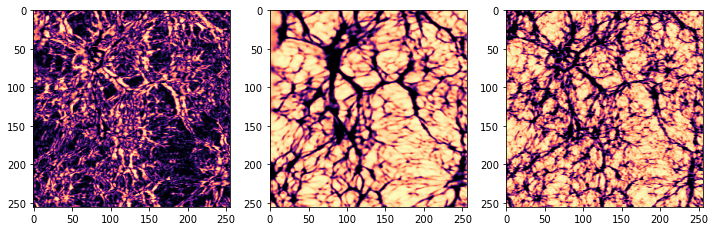

In [223]:
thisNorm = LogNorm(vmin=1e-3, vmax=1e4)
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1], height_ratios=[1])

err = abs(pyr_field - reg_field)

ax0 = fig.add_subplot(gs[0, 0])
ax0.imshow(err[16,:,:], cmap=cm.magma, )#norm=thisNorm)

ax1 = fig.add_subplot(gs[0, 1])
ax1.imshow(reg_field[16,:,:], cmap=cm.magma, )#norm=thisNorm)

ax2 = fig.add_subplot(gs[0, 2])
ax2.imshow(pyr_field[16,:,:], cmap=cm.magma, )#norm=thisNorm)

print(np.mean(err))

In [83]:
t = torch.from_numpy(pyr_field[None, :, :, :])
print(t.shape)
fft_t = torch.fft.rfftn(t, norm='ortho', dim=(1,2,3))
print(fft_t.shape)
print(fft_t[0,128,:,:])
fft_t_shift = torch.fft.fftshift(fft_t)
print(fft_t_shift.shape)
print(fft_t_shift[0,128,:,:])

torch.Size([1, 256, 256, 256])
torch.Size([1, 256, 256, 129])
tensor([[-0.3953+0.0000j, -0.0315+0.1755j, -0.2481+0.3483j,  ...,
          0.0106-0.0070j, -0.0338-0.0032j, -0.0129+0.0000j],
        [-0.0500+0.2041j, -0.1481-0.5826j, -0.1758+0.2295j,  ...,
          0.0012+0.0335j,  0.0531-0.0085j,  0.0165+0.0036j],
        [ 0.0848+0.0915j,  0.0997-0.3773j, -0.0378+0.1014j,  ...,
         -0.0171+0.0024j,  0.0171-0.0147j, -0.0076-0.0737j],
        ...,
        [ 0.3863-0.0069j, -0.0039+0.1067j,  0.1991+0.2318j,  ...,
          0.0212-0.0534j,  0.0150-0.0386j,  0.0343+0.0009j],
        [ 0.0848-0.0915j,  0.1726-0.1246j,  0.2686+0.2322j,  ...,
          0.0275+0.0374j,  0.0290-0.0351j, -0.0076+0.0737j],
        [-0.0500-0.2041j,  0.0519+0.0491j, -0.2743+0.3251j,  ...,
          0.0082-0.0075j,  0.0259-0.0692j,  0.0165-0.0036j]])


AttributeError: module 'torch.fft' has no attribute 'fftshift'

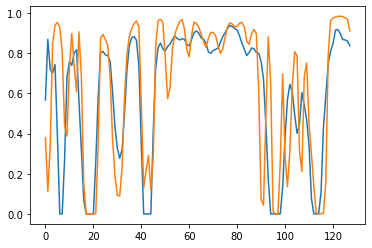

In [43]:
plt.plot(reg_field[16,16,:128])
plt.plot(pyr_field[16,16,:128])

In [41]:
print(np.mean(err[64,:,:]))

0.14290142


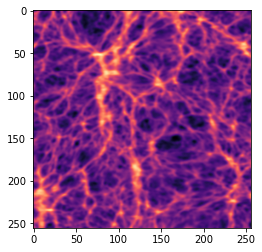

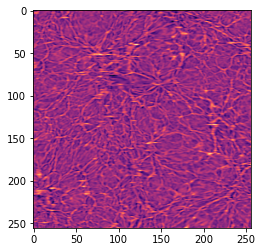

In [187]:
pyr_field_g = gaussian_filter(pyr_field, sigma=1)
plt.imshow(pyr_field_g[2,:,:], cmap=cm.magma)
plt.show()

pry_sub = pyr_field - pyr_field_g
plt.imshow(pry_sub[2,:,:], cmap=cm.magma)
plt.show()

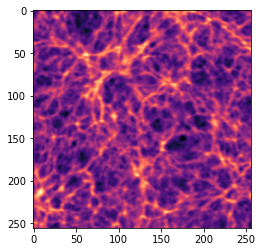

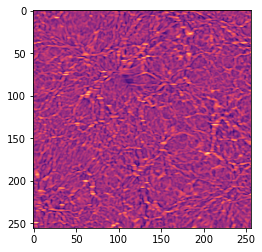

In [153]:
reg_field_g = gaussian_filter(reg_field, 1)
plt.imshow(reg_field_g[2,:,:], cmap=cm.magma)
plt.show()

reg_sub = reg_field - reg_field_g

plt.imshow(reg_sub[2,:,:], cmap=cm.magma)
plt.show()

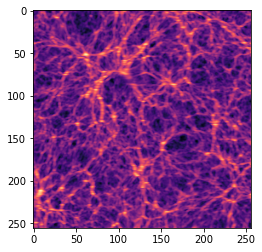

In [154]:
field_sum = pyr_field_g + reg_sub
plt.imshow(field_sum[2,:,:], cmap=cm.magma)
plt.show()


[ 0.        0.157075  0.31415   0.471225  0.6283    0.785375  0.94245
  1.099525  1.2566    1.413675  1.57075   1.727825  1.8849    2.041975
  2.19905   2.356125  2.5132    2.670275  2.82735   2.984425  3.1415
  3.298575  3.45565   3.612725  3.7698    3.926875  4.08395   4.241025
  4.3981    4.555175  4.71225   4.869325  5.0264    5.183475  5.34055
  5.497625  5.6547    5.811775  5.96885   6.125925  6.283     6.440075
  6.59715   6.754225  6.9113    7.068375  7.22545   7.382525  7.5396
  7.696675  7.85375   8.010825  8.1679    8.324975  8.48205   8.639125
  8.7962    8.953275  9.11035   9.267425  9.4245    9.581575  9.73865
  9.895725 10.0528   10.209875 10.36695  10.524025 10.6811   10.838175
 10.99525  11.152325 11.3094   11.466475 11.62355  11.780625 11.9377
 12.094775 12.25185  12.408925 12.566    12.723075 12.88015  13.037225
 13.1943   13.351375 13.50845  13.665525 13.8226   13.979675 14.13675
 14.293825 14.4509   14.607975 14.76505  14.922125 15.0792   15.236275
 15.39335  15.55

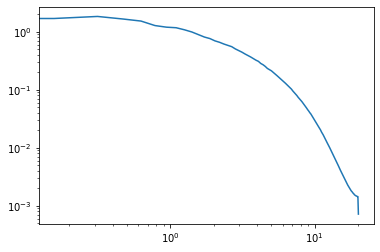

In [30]:
flux = np.exp(-reg_field)

f1, Pxx_den1 = signal.welch(flux, fs=1)
Pk1 = np.mean(Pxx_den1, axis=(0,1))
f1 = f1*512/80 * 2*3.1415



#f3, Pxx_den3 = signal.welch(field_sum, fs=1)
#Pk3 = np.mean(Pxx_den3, axis=(0,1))

plt.plot(f1, Pk1)

plt.xscale('log')
plt.yscale('log')
print(f1)

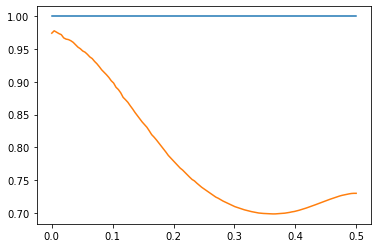

In [212]:
plt.plot(f1, Pk1/Pk1)
plt.plot(f1, Pk2/Pk1)

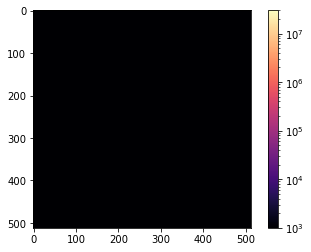

In [4]:
sub = fine_field - coarse_field
im = plt.imshow(np.abs(sub), cmap=cm.magma, norm=LogNorm(vmin=1e3, vmax=3e7))
plt.colorbar(im)

In [91]:
#field='baryon_density'
field='temperature'
#field='tau_real'

folder='native_fields' 
#folder='derived_fields' 

mid = 256
width = 64+32

real_path = '/pscratch/sd/z/zarija/MLHydro/fine_512.hdf5'
real = h5py.File(real_path, 'r')
real_field = real[folder][field][128,mid-width:mid+width,mid-width:mid+width]

trim_path = '/pscratch/sd/c/cjacobus/ML_Hydro_train/logs/hydro_vanilla/4GPU/00/infer_vanilla_size_256_trim_64.h5'
trim = h5py.File(trim_path, 'r')
trim_field = trim[folder][field][128,mid-width:mid+width,mid-width:mid+width]

chunk_path = '/pscratch/sd/c/cjacobus/ML_Hydro_train/logs/hydro_vanilla/4GPU/00/infer_vanilla_size_256_trim_0.h5'
chunk = h5py.File(chunk_path, 'r')
chunk_field = chunk[folder][field][128,mid-width:mid+width,mid-width:mid+width]

trim_err = np.divide(np.subtract(real_field, trim_field), real_field+1e-4)
chunk_err = np.divide(np.subtract(real_field, chunk_field), real_field+1e-4)

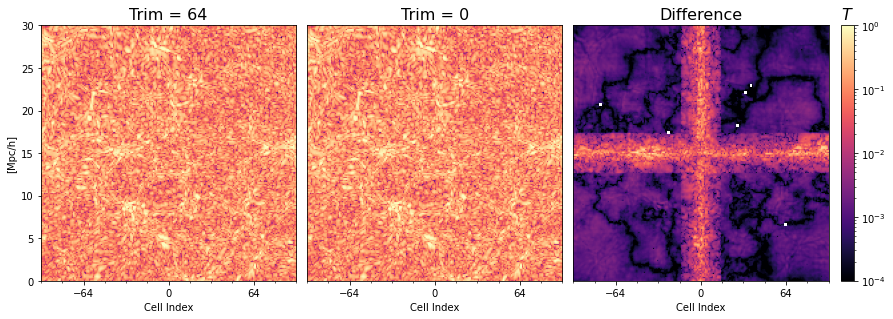

In [92]:
size = 30
shape = (64+32)

big_step=64
small_step=16

trim_field = np.absolute(trim_err)
chunk_field = np.absolute(chunk_err)

if field == 'temperature': thisNorm = LogNorm(vmin=1e-4, vmax=1)
elif field == 'tau_real': thisNorm = LogNorm(vmin=1e-2, vmax=5e2)
else: thisNorm = LogNorm(vmin=1e-4, vmax=10)

y_label_list = ['0', '5', '10', '15', '20', '25', '30']


fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(1, 4, width_ratios=[1,1,1,0.04], height_ratios=[1])


#  Varying density along a streamline
ax0 = fig.add_subplot(gs[0, 0])
ax0.imshow(trim_field, extent=[-shape,shape,-shape,shape], cmap=cm.magma, norm=thisNorm)
ax0.set_title('Trim = 64', fontsize=16)
ax0.set_yticks(np.linspace(-shape, shape, num=7))
ax0.set_yticklabels(y_label_list)
ax0.set_ylabel('[Mpc/h]')
ax0.set_xlabel('Cell Index')
ax0.xaxis.set_major_locator(plt.MultipleLocator(big_step))
ax0.xaxis.set_minor_locator(plt.MultipleLocator(small_step))
ax0.set_box_aspect(1)


ax1 = fig.add_subplot(gs[0, 1])
im = ax1.imshow(chunk_field, extent=[-shape,shape,-shape,shape], cmap=cm.magma, norm=thisNorm)
ax1.set_box_aspect(1)
ax1.set_title('Trim = 0', fontsize=16)
ax1.set_xlabel('Cell Index')
ax1.xaxis.set_major_locator(plt.MultipleLocator(big_step))
ax1.xaxis.set_minor_locator(plt.MultipleLocator(small_step))
ax1.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off

sub_field = np.subtract(trim_field, chunk_field)
sub_field = np.absolute(sub_field)

ax2 = fig.add_subplot(gs[0, 2])
err = ax2.imshow(sub_field, extent=[-shape,shape,-shape,shape], cmap=cm.magma, norm=thisNorm)
ax2.set_box_aspect(1)
ax2.set_title('Difference', fontsize=16)
ax2.set_xlabel('Cell Index')
ax2.xaxis.set_major_locator(plt.MultipleLocator(big_step))
ax2.xaxis.set_minor_locator(plt.MultipleLocator(small_step))
ax2.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off

axins = inset_axes(ax2,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=ax2.transAxes,
                   borderpad=0,
                   )

cbar1 = plt.colorbar(err, cax=axins)



if field == 'temperature': axins.set_title(r'$T$',fontsize=16)
elif field == 'tau_real': axins.set_title(r'$\tau$',fontsize=16)
else: axins.set_title(r'$\rho$ error',fontsize=16)



plt.tight_layout()
if field == 'temperature': fig.savefig('figures/err_temp_comp.png', bbox_inches='tight')
elif field == 'tau_real': fig.savefig('figures/err_tau_comp.png', bbox_inches='tight')
else: fig.savefig('figures/err_rho_comp.png', bbox_inches='tight')

plt.show()

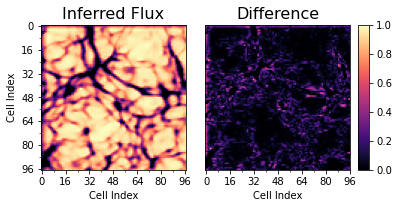

In [93]:
slice = 128
width = 96

infer_path = '/pscratch/sd/z/zarija/MLHydro/infer_OGdense.hdf5'
infer = h5py.File(infer_path, 'r')
infer_field = infer['derived_fields']['tau_red'][slice,:width+1,:width+1]
infer_field = np.exp(-infer_field)

tar_path = '/pscratch/sd/z/zarija/MLHydro/invar_pyr05_sub.hdf5'
tar = h5py.File(tar_path, 'r')
tar_field = tar['derived_fields']['tau_red'][slice,:width+1,:width+1]
tar_field = np.exp(-tar_field)

mean = np.mean(tar_field)
infer_over = (infer_field-mean)/mean
tar_over = (tar_field-mean)/mean

dif = np.abs((tar_field - infer_field))


thisNorm = mpl.colors.Normalize(vmin=0, vmax=1)

y_label_list = ['0', '5', '10', '15', '20', '25', '30']


fig = plt.figure(figsize=(6, 8))
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,0.04], height_ratios=[1])


#  Varying density along a streamline
ax0 = fig.add_subplot(gs[0, 0])
im = ax0.imshow(infer_field, cmap=cm.magma, norm=thisNorm)
ax0.set_yticks(np.linspace(0, width, num=7))
#ax0.set_yticklabels(y_label_list)
ax0.set_title('Inferred Flux', fontsize=16)
ax0.set_ylabel('Cell Index')
ax0.set_xlabel('Cell Index')
ax0.xaxis.set_major_locator(plt.MultipleLocator(16))
ax0.xaxis.set_minor_locator(plt.MultipleLocator(8))
ax0.yaxis.set_major_locator(plt.MultipleLocator(16))
ax0.yaxis.set_minor_locator(plt.MultipleLocator(8))
ax0.set_box_aspect(1)

ax1 = fig.add_subplot(gs[0, 1])
ax1.imshow(dif, cmap=cm.magma, norm=thisNorm)
ax1.set_yticks(np.linspace(0, width, num=7))
#ax0.set_yticklabels(y_label_list)
ax1.set_title('Difference', fontsize=16)
#ax1.set_ylabel('Cell Index')
ax1.set_xlabel('Cell Index')
ax1.xaxis.set_major_locator(plt.MultipleLocator(16))
ax1.xaxis.set_minor_locator(plt.MultipleLocator(8))
ax1.yaxis.set_major_locator(plt.MultipleLocator(16))
ax1.yaxis.set_minor_locator(plt.MultipleLocator(8))
ax1.set_box_aspect(1)

ax1.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off

axins = inset_axes(ax1,
                   width="8%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=ax1.transAxes,
                   borderpad=0,
                   )

cbar1 = plt.colorbar(im, cax=axins)

fig.savefig('edge_effects.png', bbox_inches='tight')
plt.show()

In [25]:
#field='baryon_density'
#field='temperature'
field='tau_red'

#folder='native_fields' 
folder='derived_fields' 

slice = 176
mid = 240
width = 64

coarse_path = '/pscratch/sd/z/zarija/MLHydro/L80_N512_z3_s2.hdf5'
coarse = h5py.File(coarse_path, 'r')
coarse_field = coarse[folder][field][slice,mid-width:mid+width+1,mid-width:mid+width+1]
coarse_field = np.exp(-coarse_field)

infer_path = '/pscratch/sd/z/zarija/MLHydro/valid_new_fft_pdf.hdf5'
infer = h5py.File(infer_path, 'r')
infer_field = infer['derived_fields']['tau_red'][slice,mid-width:mid+width+1,mid-width:mid+width+1]
infer_field = np.exp(-infer_field)

big_slice = slice*8+3
big_mid = mid*8
big_width = width*8

fine_path = '/pscratch/sd/z/zarija/MLHydro/L80_N4096_z3_s2.hdf5'
fine = h5py.File(fine_path, 'r')
fine_field = fine[folder][field][big_slice,big_mid-big_width:big_mid+big_width+1,big_mid-big_width:big_mid+big_width+1]
fine_field = np.exp(-fine_field)


<ipython-input-28-1bcf1573e21b>:87: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


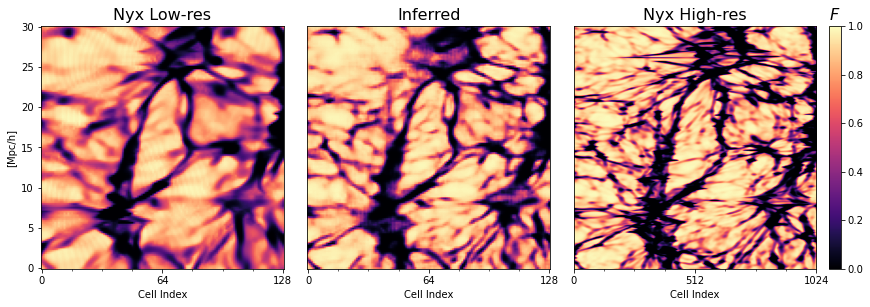

In [28]:
import matplotlib as mpl

size = 30
shape = (64+32)

big_step=64
small_step=16


'''
if field == 'temperature': thisNorm = LogNorm(vmin=1e-4, vmax=1)
elif field == 'tau_real': thisNorm = LogNorm(vmin=1e-2, vmax=5e2)
else: thisNorm = LogNorm(vmin=1e-4, vmax=10)
'''
thisNorm = mpl.colors.Normalize(vmin=0, vmax=1)

y_label_list = ['30', '25', '20', '15', '10', '5', '0'] #['0', '5', '10', '15', '20', '25', '30']


fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(1, 4, width_ratios=[1,1,1,0.04], height_ratios=[1])


#  Varying density along a streamline
ax0 = fig.add_subplot(gs[0, 0])
ax0.imshow(coarse_field, cmap=cm.magma, norm=thisNorm)
ax0.set_title('Nyx Low-res', fontsize=16)
ax0.set_yticks(np.linspace(0, width*2, num=7))
ax0.set_yticklabels(y_label_list)
ax0.set_ylabel('[Mpc/h]')
ax0.set_xlabel('Cell Index')
ax0.xaxis.set_major_locator(plt.MultipleLocator(big_step))
ax0.xaxis.set_minor_locator(plt.MultipleLocator(small_step))
ax0.set_box_aspect(1)


ax1 = fig.add_subplot(gs[0, 1])
im = ax1.imshow(infer_field, cmap=cm.magma, norm=thisNorm)
ax1.set_box_aspect(1)
ax1.set_title('Inferred', fontsize=16)
ax1.set_xlabel('Cell Index')
ax1.xaxis.set_major_locator(plt.MultipleLocator(big_step))
ax1.xaxis.set_minor_locator(plt.MultipleLocator(small_step))
ax1.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off


ax2 = fig.add_subplot(gs[0, 2])
im = ax2.imshow(fine_field, cmap=cm.magma, norm=thisNorm)
ax2.set_box_aspect(1)
ax2.set_title('Nyx High-res', fontsize=16)
ax2.set_xlabel('Cell Index')
ax2.xaxis.set_major_locator(plt.MultipleLocator(512))
ax2.xaxis.set_minor_locator(plt.MultipleLocator(128))
ax2.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off

axins = inset_axes(ax2,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=ax2.transAxes,
                   borderpad=0,
                   )

cbar1 = plt.colorbar(im, cax=axins)


axins.set_title(r'$F$',fontsize=16)



plt.tight_layout()


fig.savefig('figures/flux_comp.png', bbox_inches='tight')
fig.savefig('figures/flux_comp.jpg', bbox_inches='tight')
plt.show()

In [70]:
slice = 176
mid = 240
width = 64

coarse_path = '/pscratch/sd/z/zarija/MLHydro/L80_N512_z3_s2.hdf5'
coarse = h5py.File(coarse_path, 'r')
coarse_rho = coarse['native_fields']['baryon_density'][slice,mid-width:mid+width+1,mid-width:mid+width+1]
coarse_temp = coarse['native_fields']['temperature'][slice,mid-width:mid+width+1,mid-width:mid+width+1]


infer_path = '/pscratch/sd/z/zarija/MLHydro/valid_TSIT_L1.hdf5'
infer = h5py.File(infer_path, 'r')
infer_rho = infer['native_fields']['baryon_density'][slice,mid-width:mid+width+1,mid-width:mid+width+1]
infer_temp = infer['native_fields']['temperature'][slice,mid-width:mid+width+1,mid-width:mid+width+1]

big_slice = slice*8+3
big_mid = mid*8
big_width = width*8

fine_path = '/pscratch/sd/z/zarija/MLHydro/L80_N4096_z3_s2.hdf5'
fine = h5py.File(fine_path, 'r')
fine_rho = fine['native_fields']['baryon_density'][big_slice,big_mid-big_width:big_mid+big_width+1,big_mid-big_width:big_mid+big_width+1]
fine_temp = fine['native_fields']['temperature'][big_slice,big_mid-big_width:big_mid+big_width+1,big_mid-big_width:big_mid+big_width+1]


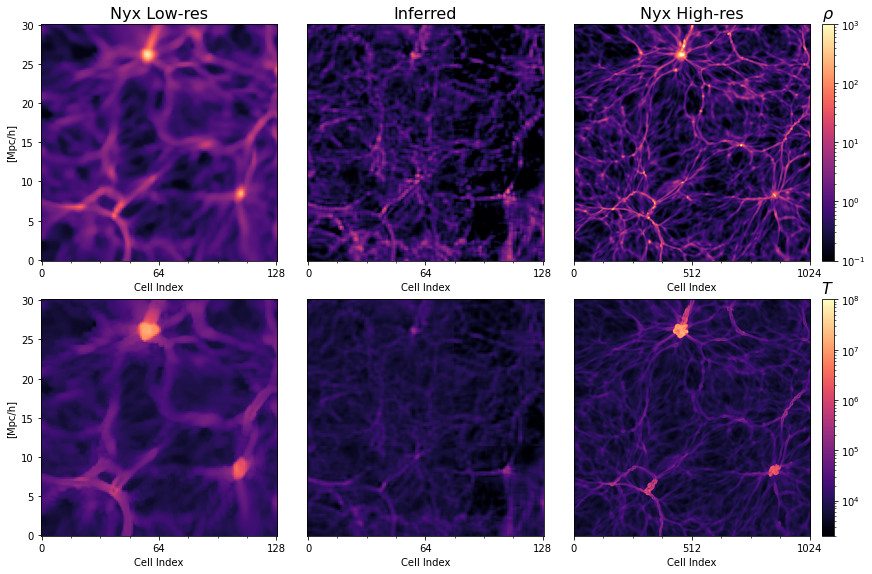

In [71]:
import matplotlib.colors as colors
size = 30
shape = 64

big_step=64
small_step=16

rhoNorm = LogNorm(vmin=1e-1, vmax=1e+3)
tempNorm = LogNorm(vmin=2e+3, vmax=1e+8)# colors.LogNorm(vmin=1e+3, vmax=1e+7) #LogNorm(vmin=0.0001, vmax=10)


y_label_list = ['30', '25', '20', '15', '10', '5', '0']


fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(2, 4, width_ratios=[1,1,1,0.04], height_ratios=[1,1])


#  Varying density along a streamline
ax0 = fig.add_subplot(gs[0, 0])
ax0.imshow(coarse_rho, cmap=cm.magma, norm=rhoNorm)
ax0.set_title('Nyx Low-res', fontsize=16)
ax0.set_yticks(np.linspace(0, width*2, num=7))
ax0.set_yticklabels(y_label_list)
ax0.set_ylabel('[Mpc/h]')
ax0.set_xlabel('Cell Index')
ax0.xaxis.set_major_locator(plt.MultipleLocator(big_step))
ax0.xaxis.set_minor_locator(plt.MultipleLocator(small_step))
ax0.set_box_aspect(1)


ax1 = fig.add_subplot(gs[0, 1])
ax1.imshow(infer_rho, cmap=cm.magma, norm=rhoNorm)
ax1.set_box_aspect(1)
ax1.set_title('Inferred', fontsize=16)
ax1.set_xlabel('Cell Index')
ax1.xaxis.set_major_locator(plt.MultipleLocator(big_step))
ax1.xaxis.set_minor_locator(plt.MultipleLocator(small_step))
ax1.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off


ax2 = fig.add_subplot(gs[0, 2])
im = ax2.imshow(fine_rho, cmap=cm.magma, norm=rhoNorm)
ax2.set_box_aspect(1)
ax2.set_title('Nyx High-res', fontsize=16)
ax2.set_xlabel('Cell Index')
ax2.xaxis.set_major_locator(plt.MultipleLocator(512))
ax2.xaxis.set_minor_locator(plt.MultipleLocator(128))
ax2.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off

axins = inset_axes(ax2,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=ax2.transAxes,
                   borderpad=0,
                   )

cbar1 = plt.colorbar(im, cax=axins)

axins.set_title(r'$\rho$',fontsize=16)


ax01 = fig.add_subplot(gs[1, 0])
ax01.imshow(coarse_temp, cmap=cm.magma, norm=tempNorm)
ax01.set_yticks(np.linspace(0, width*2, num=7))
ax01.set_yticklabels(y_label_list)
ax01.set_ylabel('[Mpc/h]')
ax01.set_xlabel('Cell Index')
ax01.xaxis.set_major_locator(plt.MultipleLocator(big_step))
ax01.xaxis.set_minor_locator(plt.MultipleLocator(small_step))
ax01.set_box_aspect(1)


ax11 = fig.add_subplot(gs[1, 1])
ax11.imshow(infer_temp, cmap=cm.magma, norm=tempNorm)
ax11.set_box_aspect(1)
ax11.set_xlabel('Cell Index')
ax11.xaxis.set_major_locator(plt.MultipleLocator(big_step))
ax11.xaxis.set_minor_locator(plt.MultipleLocator(small_step))
ax11.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off


ax21 = fig.add_subplot(gs[1, 2])
im1 = ax21.imshow(fine_temp, cmap=cm.magma, norm=tempNorm)
ax21.set_box_aspect(1)
ax21.set_xlabel('Cell Index')
ax21.xaxis.set_major_locator(plt.MultipleLocator(512))
ax21.xaxis.set_minor_locator(plt.MultipleLocator(128))
ax21.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off

axins1 = inset_axes(ax21,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=ax21.transAxes,
                   borderpad=0,
                   )

cbar2 = plt.colorbar(im1, cax=axins1)

axins1.set_title(r'$T$',fontsize=16)





plt.tight_layout()

fig.savefig('figures/hydro_comp.png', bbox_inches='tight')
fig.savefig('figures/hydro_comp.jpg', bbox_inches='tight')
plt.show()

In [7]:
#field='baryon_density'
#field='temperature'
field='tau_real'

#folder='native_fields' 
folder='derived_fields' 

coarse_path = '/pscratch/sd/z/zarija/MLHydro/L80_N512_z3_s1.hdf5'
coarse = h5py.File(coarse_path, 'r')
coarse_field = coarse[folder][field][0,:,:]

infer_path = '/pscratch/sd/z/zarija/MLHydro/infer_vanilla_512.hdf5'
infer = h5py.File(infer_path, 'r')
infer_field = infer[folder][field][8,:,:]

fine_path = '/pscratch/sd/z/zarija/MLHydro/fine_512.hdf5'
fine = h5py.File(fine_path, 'r')
fine_field = fine[folder][field][0,:,:]


In [82]:
from scipy.interpolate import InterpolatedUnivariateSpline

a_path = '/global/u1/c/cjacobus/gimlet/master/apps/sim_stats/s2_4096_'
b_path = '/global/u1/c/cjacobus/gimlet/master/apps/sim_stats/s2_512_'

c_path = '/global/u1/c/cjacobus/gimlet/master/apps/sim_stats/s2_subsample_' 

d_path = '/global/u1/c/cjacobus/gimlet/master/apps/sim_stats/TSIT_1_'

paths = [a_path, b_path, c_path, d_path]
names = ['Nyx High-res', 'Nyx Low-res', 'Pyramid Resize', 'Inferred', 'Pyramid 512']
lines = [':', '-', '-', '-', '-', '-']
colors = ['black', 'grey', 'darkorange', 'blueviolet', 'mediumvioletred', 'darkblue']

labels = [r'$\rho$', 'v', 'T']
units = ['', ' [cm/s]', ' [K]']

pdf_files = ['rhob_pdf.txt', 'vz_pdf.txt', 'temp_pdf.txt']
pdfs = []
pdf_starts = []
pdf_ends = []

ps3d_files = ['rhob_ps3d.txt', 'vz_ps3d.txt', 'temp_ps3d.txt']
ps3ds = []
ps3d_starts = []
ps3d_ends = []

for pdf_file in pdf_files:
    these_pdfs = []
    these_starts = []
    these_ends = []
    for path in paths:
        this_rho_pdf = np.loadtxt(path + pdf_file)
        this_rho_pdf = np.delete(this_rho_pdf, np.argwhere(this_rho_pdf[:,3]<=1e-9), 0)
        this_rho_pdf = np.delete(this_rho_pdf, np.argwhere(this_rho_pdf[:,2]==0.0), 0)
        these_starts.append(this_rho_pdf[0,2])
        these_ends.append(this_rho_pdf[-1,2])
        spline = InterpolatedUnivariateSpline(this_rho_pdf[:,2], this_rho_pdf[:,3])
        these_pdfs.append(spline)
    pdfs.append(these_pdfs)
    pdf_starts.append(these_starts)
    pdf_ends.append(these_ends)
    
for ps3d_file in ps3d_files:
    these_ps3ds = []
    these_starts = []
    these_ends = []
    for path in paths:
        this_rho_ps3d = np.loadtxt(path + ps3d_file)
        this_rho_ps3d = np.delete(this_rho_ps3d, np.argwhere(this_rho_ps3d[:,3]<=1e-9), 0)
        this_rho_ps3d = np.delete(this_rho_ps3d, np.argwhere(this_rho_ps3d[:,2]==0.0), 0)
        these_starts.append(this_rho_ps3d[0,2])
        these_ends.append(this_rho_ps3d[-1,2])
        spline = InterpolatedUnivariateSpline(this_rho_ps3d[:,2], this_rho_ps3d[:,3])
        these_ps3ds.append(spline)
    ps3ds.append(these_ps3ds)
    ps3d_starts.append(these_starts)
    ps3d_ends.append(these_ends)
    

print(pdf_starts)
print(pdf_ends)

[[0.02254658, 0.067868893, 0.026828916, 0.0010500848], [0.010357373, 0.010348932, 0.010346938, 0.010334288], [2202.0312, 2648.7297, 2345.3321, 326.61541]]
[[95590.463, 1350.3521, 14069.866, 95444.202], [1053.9795, 847.49038, 852.77859, 4002.5762], [10550769.0, 9287205.0, 8181919.6, 96948169.0]]


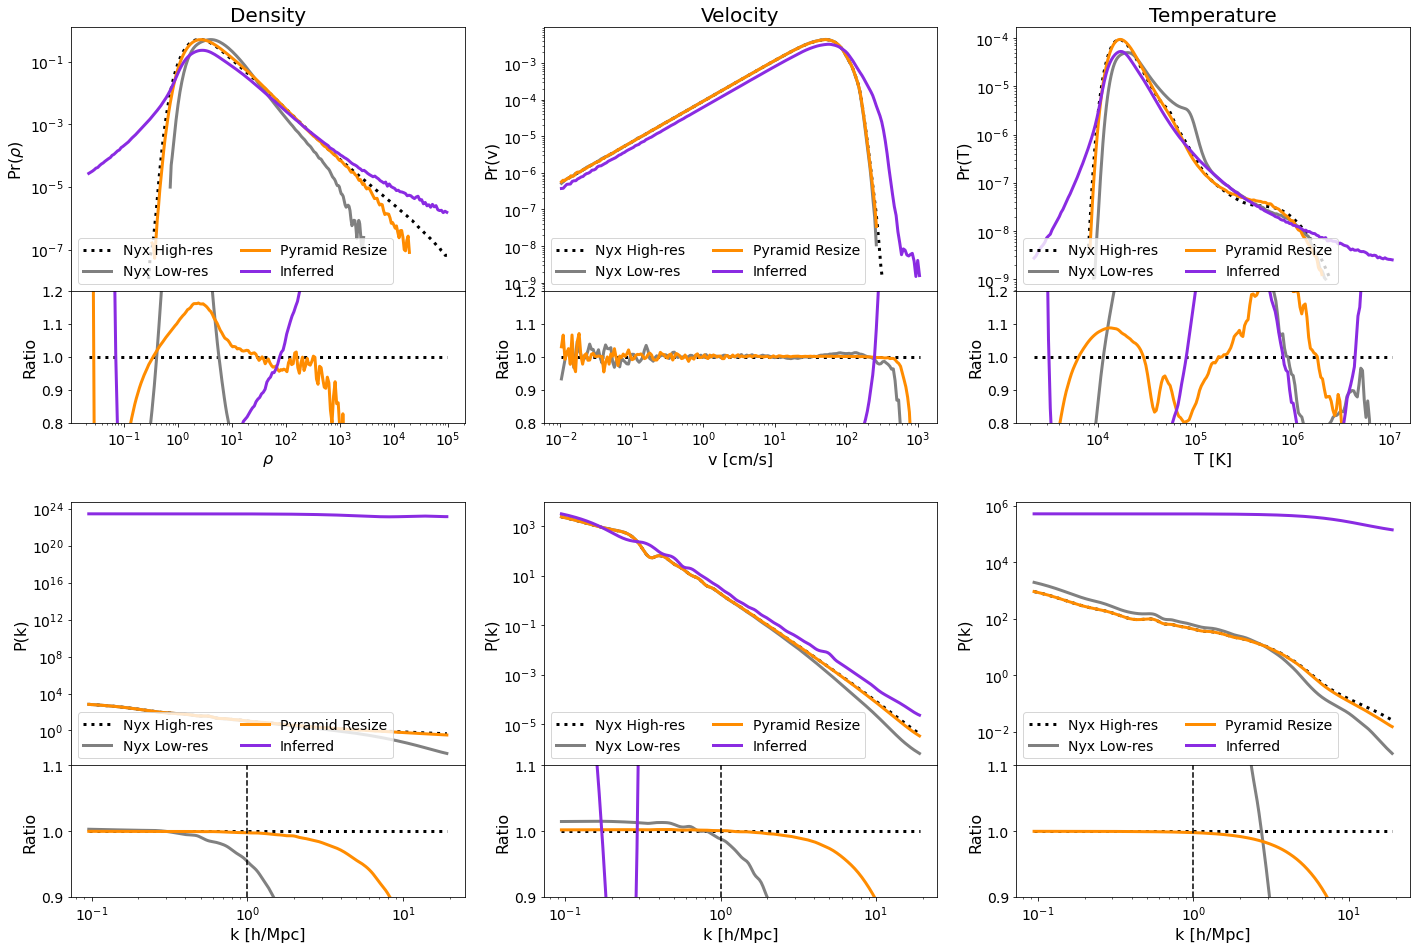

In [83]:
import warnings
warnings.filterwarnings("ignore")

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

w=3
ts=20
ls=16
tick=14


sub_size="50%" 
pad=0




def plot_pdf(i, ax, axr):
    #xs = np.logspace(np.log10(np.min(pdf_starts[i][:])), np.log10(np.min(pdf_ends[i][:])), num=200, base=10.0)
    
    for idx, spline in enumerate(pdfs[i][:]):
        xs = np.logspace(np.log10(np.min(pdf_starts[i][idx])), np.log10(np.min(pdf_ends[i][idx])), num=200, base=10.0)
        ax.plot(xs, spline(xs), lines[idx], label=names[idx], c=colors[idx], lw=w)
    
    ax.set_ylabel(f'Pr({labels[i]})', fontsize=ls)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.tick_params(axis='y', labelsize=tick)
    ax.set_xticklabels([])
    ax.legend(loc='lower left', fontsize=tick, ncol=2)
    
   
    axr.plot([pdf_starts[i][0], pdf_ends[i][0]], [1, 1], lines[0], label=names[0], c=colors[0], lw=w)
    
    for idx, spline in enumerate(pdfs[i][1:]):
        xs = np.logspace(np.log10(np.max([pdf_starts[i][0], pdf_starts[i][idx+1]])), np.log10(np.min([pdf_ends[i][0], pdf_ends[i][idx+1]])), num=200, base=10.0)
        axr.plot(xs, spline(xs)/pdfs[i][0](xs), lines[idx+1], label=names[idx+1], c=colors[idx+1], lw=w)
    
    axr.set_xlabel(labels[i] + units[i], fontsize=ls)
    axr.set_ylabel('Ratio', fontsize=ls)

    axr.set_xscale('log')
    #axr.set_yscale('log')
    axr.set_ylim([0.8, 1.2])
    
    axr.tick_params(axis='x', labelsize=tick)
    axr.tick_params(axis='y', labelsize=tick)
    
def plot_ps3d(i, ax, axr):
    #xs = np.logspace(np.log10(np.min(ps3d_starts[i][:])), np.log10(np.min(ps3d_ends[i][:])), num=200, base=10.0)
    
    for idx, spline in enumerate(ps3ds[i][:]):
        xs = np.logspace(np.log10(np.min(ps3d_starts[i][:])), np.log10(np.min(ps3d_ends[i][:])), num=200, base=10.0)
        ax.plot(xs, spline(xs), lines[idx], label=names[idx], c=colors[idx], lw=w)
    
    ax.set_ylabel(f'P(k)', fontsize=ls)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.tick_params(axis='y', labelsize=tick)
    ax.set_xticklabels([])
    ax.legend(loc='lower left', fontsize=tick, ncol=2)
    
   
    axr.plot([ps3d_starts[i][1], ps3d_ends[i][1]], [1, 1], lines[0], label=names[0], c=colors[0], lw=w)
    
    for idx, spline in enumerate(ps3ds[i][1:]):
        xs = np.logspace(np.log10(np.min(ps3d_starts[i][:])), np.log10(np.min(ps3d_ends[i][:])), num=200, base=10.0)
        axr.plot(xs, spline(xs)/ps3ds[i][0](xs), lines[idx+1], label=names[idx+1], c=colors[idx+1], lw=w)
    axr.axvline(x=1, color='k', linestyle='--')
    
    axr.set_xlabel("k [h/Mpc]", fontsize=ls)
    axr.set_ylabel('Ratio', fontsize=ls)

    axr.set_xscale('log')
    #axr.set_yscale('log')
    axr.set_ylim([0.9, 1.1])
    
    axr.tick_params(axis='x', labelsize=tick)
    axr.tick_params(axis='y', labelsize=tick)
    
    
    
fig = plt.figure(figsize=(24, 16))
gs = gridspec.GridSpec(2, 3, width_ratios=[1,1,1], height_ratios=[1,1])

ax0 = fig.add_subplot(gs[0, 0])
divider0 = make_axes_locatable(ax0)
ax0r = divider0.append_axes("bottom", size=sub_size, pad=pad)
ax0.figure.add_axes(ax0r)
plot_pdf(0, ax0, ax0r)
ax0.set_title('Density', fontsize=ts)

ax1 = fig.add_subplot(gs[0, 1])
divider1 = make_axes_locatable(ax1)
ax1r = divider1.append_axes("bottom", size=sub_size, pad=pad)
ax1.figure.add_axes(ax1r)
plot_pdf(1, ax1, ax1r)
ax1.set_title('Velocity', fontsize=ts)

ax2 = fig.add_subplot(gs[0, 2])
divider2 = make_axes_locatable(ax2)
ax2r = divider2.append_axes("bottom", size=sub_size, pad=pad)
ax2.figure.add_axes(ax2r)
plot_pdf(2, ax2, ax2r)
ax2.set_title('Temperature', fontsize=ts)

ax3 = fig.add_subplot(gs[1, 0])
divider3 = make_axes_locatable(ax3)
ax3r = divider3.append_axes("bottom", size=sub_size, pad=pad)
ax3.figure.add_axes(ax3r)
plot_ps3d(0, ax3, ax3r)

ax4 = fig.add_subplot(gs[1, 1])
divider4 = make_axes_locatable(ax4)
ax4r = divider4.append_axes("bottom", size=sub_size, pad=pad)
ax4.figure.add_axes(ax4r)
plot_ps3d(1, ax4, ax4r)

ax5 = fig.add_subplot(gs[1, 2])
divider5 = make_axes_locatable(ax5)
ax5r = divider5.append_axes("bottom", size=sub_size, pad=pad)
ax5.figure.add_axes(ax5r)
plot_ps3d(2, ax5, ax5r)

#for ax in axs:
    #ax.label_outer()
    
plt.subplots_adjust(hspace=None)
fig.savefig('figures/Hydro_stats.jpg', bbox_inches='tight')
fig.savefig('figures/Hydro_stats.png', bbox_inches='tight')
plt.show()

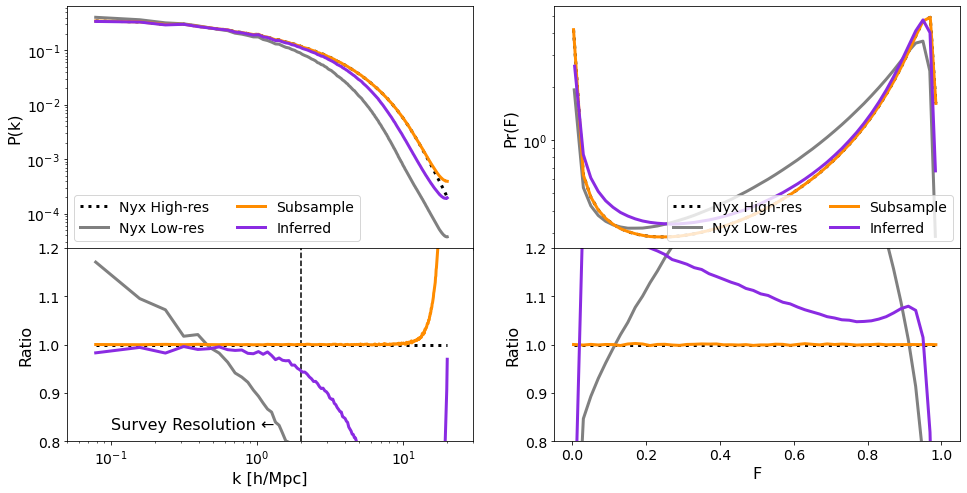

In [90]:
import warnings
warnings.filterwarnings("ignore")

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

a_flux_1dps = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/lya_products/s2_4096_flux_ps1d.txt')
b_flux_1dps = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/lya_products/s2_512_flux_ps1d.txt')
c_flux_1dps = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/lya_products/s2_subsample_flux_ps1d.txt')

d_flux_1dps = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/lya_products/valid_new_fft_pdf_flux_ps1d.txt')
#e_flux_1dps = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/lya_products/valid_new_fft_pdf_flux_ps1d.txt')

pk_data = [a_flux_1dps, b_flux_1dps, c_flux_1dps, d_flux_1dps]

# = = = = = = = = = = = = = =

a_flux_pdf = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/lya_products/s2_4096_flux_pdf.txt')
b_flux_pdf = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/lya_products/s2_512_flux_pdf.txt')
c_flux_pdf = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/lya_products/s2_subsample_flux_pdf.txt')

d_flux_pdf = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/lya_products/infer_sig03_rev_flux_pdf.txt')
#e_flux_pdf = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/lya_products/infer_sig03_rev_flux_pdf.txt')



pdf_data = [a_flux_pdf, b_flux_pdf, c_flux_pdf, d_flux_pdf ]


names = ['Nyx High-res', 'Nyx Low-res', 'Subsample', 'Inferred', 'Inferred']
colors = ['black', 'grey', 'darkorange', 'blueviolet', 'mediumvioletred', 'darkblue', 'darkblue']
lines = [':', '-', '-', '-', '-', '-', ':']

w=3
ts=20
ls=16
tick=14

k='black'
o='darkorange'
p='mediumvioletred'
b='blueviolet'

fig = plt.figure(figsize=(16, 8))
gs =  fig.add_gridspec(1, 2, width_ratios=[1,1], hspace=0)
axs = gs.subplots()

# Plot each graph, and manually set the y tick values
for i, line in enumerate(pk_data):
    axs[0].plot(line[:,2][:255], line[:,3][:255], lines[i], label=names[i], c=colors[i], lw=w)


axs[0].set_ylabel('P(k)', fontsize=ls)
axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[0].tick_params(axis='y', labelsize=tick)
axs[0].set_xticklabels([])
axs[0].legend(loc='lower left', fontsize=tick, ncol=2)
axs[0].set_xlim([5e-2, 30])

divider0 = make_axes_locatable(axs[0])
ax0r = divider0.append_axes("bottom", size='80%', pad=0)
axs[0].figure.add_axes(ax0r)

ax0r.axvline(x=2, color='k', linestyle='--')
for i, line in enumerate(pk_data):
    ax0r.plot(line[:,2][:255], line[:,3][:255]/a_flux_1dps[:,3][:255], lines[i], label=names[i], c=colors[i], lw=w)

ax0r.set_xlabel('k [h/Mpc]', fontsize=ls)
ax0r.set_ylabel('Ratio', fontsize=ls)
#axs[1][0].set_ylabel('T(k)', fontsize=ls)

ax0r.set_xscale('log')
ax0r.set_ylim([0.8, 1.2])
ax0r.set_xlim([5e-2, 30])

ax0r.text(1e-1, 0.825, 'Survey Resolution ←', fontsize=16)

ax0r.tick_params(axis='x', labelsize=tick)
ax0r.tick_params(axis='y', labelsize=tick)


# Plot each graph, and manually set the y tick values
for i, line in enumerate(pdf_data):
    axs[1].plot(line[:,2], line[:,3], lines[i], label=names[i], c=colors[i], lw=w)


axs[1].set_ylabel('Pr(F)', fontsize=ls)
axs[1].set_yscale('log')
axs[1].tick_params(axis='y', labelsize=tick)
axs[1].legend(loc='lower right', fontsize=tick, ncol=2)

divider1 = make_axes_locatable(axs[1])
ax1r = divider1.append_axes("bottom", size='80%', pad=0)
axs[1].figure.add_axes(ax1r)
axs[1].set_xlim([-0.05, 1.05])

for i, line in enumerate(pdf_data):
    ax1r.plot(line[:,2], line[:,3]/a_flux_pdf[:,3], lines[i], label=names[i], c=colors[i], lw=w)
    #ax1r.plot(line[:,2][:255], np.sqrt(line[:,3][:255]/a_flux_1dps[:,3][:255]), lines[i], label=names[i], c=colors[i], lw=w)

ax1r.set_xlabel('F', fontsize=ls)
ax1r.set_ylabel('Ratio', fontsize=ls)

ax1r.set_ylim([0.8, 1.2])
ax1r.set_xlim([-0.05, 1.05])

ax1r.tick_params(axis='x', labelsize=tick)
ax1r.tick_params(axis='y', labelsize=tick)

#axs[1].xaxis.set_major_locator(plt.MultipleLocator(0.2))
#axs[1].xaxis.set_minor_locator(plt.MultipleLocator(0.1))





plt.subplots_adjust(hspace=None)
fig.savefig('figures/flux_stats.jpg', bbox_inches='tight')
fig.savefig('figures/flux_stats.png', bbox_inches='tight')
plt.show()

(134217728,)
(134217728,)
(134217728,)
(134217728,)
(134217728,)
(134217728,)
x_space: [1.00000000e-02 1.24519708e-02 1.55051578e-02 1.93069773e-02
 2.40409918e-02 2.99357729e-02 3.72759372e-02 4.64158883e-02
 5.77969288e-02 7.19685673e-02 8.96150502e-02 1.11588399e-01
 1.38949549e-01 1.73019574e-01 2.15443469e-01 2.68269580e-01
 3.34048498e-01 4.15956216e-01 5.17947468e-01 6.44946677e-01
 8.03085722e-01 1.00000000e+00 1.24519708e+00 1.55051578e+00
 1.93069773e+00 2.40409918e+00 2.99357729e+00 3.72759372e+00
 4.64158883e+00 5.77969288e+00 7.19685673e+00 8.96150502e+00
 1.11588399e+01 1.38949549e+01 1.73019574e+01 2.15443469e+01
 2.68269580e+01 3.34048498e+01 4.15956216e+01 5.17947468e+01
 6.44946677e+01 8.03085722e+01 1.00000000e+02 1.24519708e+02
 1.55051578e+02 1.93069773e+02 2.40409918e+02 2.99357729e+02
 3.72759372e+02 4.64158883e+02 5.77969288e+02 7.19685673e+02
 8.96150502e+02 1.11588399e+03 1.38949549e+03 1.73019574e+03
 2.15443469e+03 2.68269580e+03 3.34048498e+03 4.15956216e+0

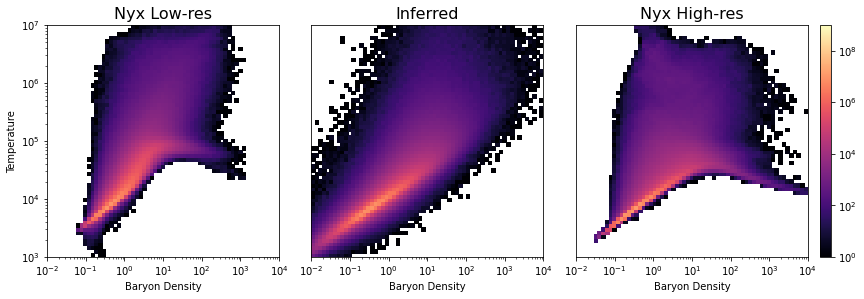

In [77]:
dtype=np.single

a_path = '/pscratch/sd/z/zarija/MLHydro/L80_N512_z3_s2.hdf5'
a = h5py.File(a_path, 'r')

b_path = '/pscratch/sd/z/zarija/MLHydro/valid_TSIT_L1.hdf5'
b = h5py.File(b_path, 'r')

c_path = '/pscratch/sd/z/zarija/MLHydro/L80_N4096_z3_s2.hdf5'
c = h5py.File(c_path, 'r')

a_rhos = a['native_fields']['baryon_density'][:,:,:].astype(dtype)
a_rhos = a_rhos.reshape(512**3)
print(a_rhos.shape)

a_Ts = a['native_fields']['temperature'][:,:,:].astype(dtype)
a_Ts = a_Ts.reshape(512**3)
print(a_Ts.shape)

b_rhos = b['native_fields']['baryon_density'][:,:,:].astype(dtype)
b_rhos = b_rhos.reshape(512**3)
print(b_rhos.shape)
b_Ts = b['native_fields']['temperature'][:,:,:].astype(dtype)
b_Ts = b_Ts.reshape(512**3)
print(b_Ts.shape)

c_rhos = c['native_fields']['baryon_density'][:8,:,:].astype(dtype)
c_rhos = c_rhos.reshape(512**3)
print(c_rhos.shape)
c_Ts = c['native_fields']['temperature'][:8,:,:].astype(dtype)
c_Ts = c_Ts.reshape(512**3)
print(c_Ts.shape)

thisNorm = LogNorm(vmin=1e0, vmax=1e9)

x_space = np.logspace(-2, 4, 64)
print('x_space:', x_space)

y_space = np.logspace(3, 7, 64)
print('y_space:', y_space)

fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(1, 4, width_ratios=[1,1,1,0.04], height_ratios=[1])


#  Varying density along a streamline
ax0 = fig.add_subplot(gs[0, 0])
ax0.hist2d(a_rhos, a_Ts, bins=(x_space, y_space), norm=thisNorm, cmap=cm.magma);
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_title('Nyx Low-res', fontsize=16)
ax0.set_ylabel('Temperature')
ax0.set_xlabel('Baryon Density')
ax0.set_box_aspect(1)


ax1 = fig.add_subplot(gs[0, 1])
ax1.hist2d(b_rhos, b_Ts, bins=(x_space, y_space), norm=thisNorm, cmap=cm.magma);
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_box_aspect(1)
ax1.set_title('Inferred', fontsize=16)
ax1.set_xlabel('Baryon Density')
ax1.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off

ax2 = fig.add_subplot(gs[0, 2])
im = ax2.hist2d(c_rhos, c_Ts, bins=(x_space, y_space), norm=thisNorm, cmap=cm.magma);
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_box_aspect(1)
ax2.set_title('Nyx High-res', fontsize=16)
ax2.set_xlabel('Baryon Density')
ax2.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off

axins = inset_axes(ax2,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=ax2.transAxes,
                   borderpad=0,
                   )

cbar1 = plt.colorbar(im[3], cax=axins)

plt.tight_layout()
fig.savefig('figures/hist2d_grid.png', bbox_inches='tight')
fig.savefig('figures/hist2d_grid.jpg', bbox_inches='tight')
fig.show()

In [3]:
from scipy.interpolate import InterpolatedUnivariateSpline
np.single


paths = [
    #'/pscratch/sd/z/zarija/MLHydro/L80_N4096_z3_s1.hdf5',
    '/pscratch/sd/z/zarija/MLHydro/hydro_pyr066_tau_sub.hdf5',
    '/pscratch/sd/z/zarija/MLHydro/L80_N512_z3_s1.hdf5',
    '/pscratch/sd/z/zarija/MLHydro/invar_pyr05_sub.hdf5',
    
    
    '/pscratch/sd/z/zarija/MLHydro/infer_sig03.hdf5',
    '/pscratch/sd/z/zarija/MLHydro/infer_sig03_fft.hdf5',

    ]


#paths = [a_path, b_path, c_path, d_path]
names = ['Subsample 512', 'Original 512',  'Sub-local Mean 512', 'Inferred 512', 'Inferred 512', 'Inferred 512', " ", " ", " ", " "]
lines = [':', '-', '-', '-', '-', '-', '-', '-', '-']
colors = ['black', 'grey', 'darkorange', 'mediumvioletred', 'blueviolet', 'darkblue', 'darkorange', 'mediumvioletred', 'blueviolet', 'darkblue']
size = 80
shapes = [512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512]




spline_ps1ds = []
ps1ds = []
fs = []

for i, path in enumerate(paths):
    file = h5py.File(path, 'r')
    skip = 1 if shapes[i] <= 512 else 64
    #tau_field = file['derived_fields']['tau_red'][16:-16,16:-16,16:-16].astype(np.single)
    tau_field = file['derived_fields']['tau_red'][:,:,:].astype(np.single)

    
    if True:
        flux = np.exp(-tau_field)
    else:
        flux = tau_field
    mean = np.mean(flux)
    over = (flux-mean)/mean
    
    f, Pxx_den = signal.periodogram(over, fs=shapes[i]/size, scaling='spectrum', axis=-1) # spectrum || density
    Pk = np.mean(Pxx_den, axis=(0,1))
    f = f*2*3.1415
    
    print(f[-1])

    spline = InterpolatedUnivariateSpline(f, Pk)
    
    spline_ps1ds.append(spline)
    ps1ds.append(Pk)
    fs.append(f)
    

20.105600000000003
20.105600000000003
20.105600000000003
20.105600000000003
20.105600000000003


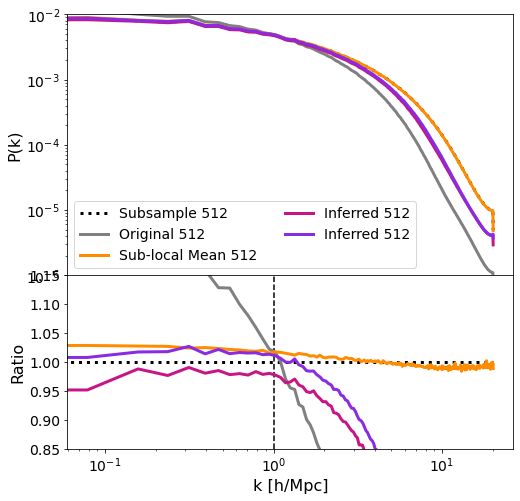

In [4]:
import warnings
warnings.filterwarnings("ignore")
w=3
ts=20
ls=16
tick=14


fig = plt.figure(figsize=(8, 8))
gs =  fig.add_gridspec(2, 1, height_ratios=[3,2], hspace=0)
axs = gs.subplots(sharex=True)

fs = np.logspace(np.log10(0.1), np.log10(20), num=100, base=10.0)
for idx, ps1d in enumerate(ps1ds):
        
        axs[0].plot(f, ps1d, lines[idx], label=names[idx], c=colors[idx], lw=w)


axs[0].set_ylabel('P(k)', fontsize=ls)
axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[0].tick_params(axis='y', labelsize=tick)
axs[0].set_xticklabels([])
axs[0].legend(loc='lower left', fontsize=tick, ncol=2)
axs[0].set_ylim([0.000001, 0.01])

axs[1].axvline(x=1, color='black', linestyle='--')

for idx, ps1d in enumerate(ps1ds[:]):
        axs[1].plot(f, ps1d/ps1ds[0], lines[idx], label=names[idx], c=colors[idx], lw=w)


axs[1].set_xlabel('k [h/Mpc]', fontsize=ls)
axs[1].set_ylabel('Ratio', fontsize=ls)

axs[1].set_xscale('log')
axs[1].set_ylim([0.85, 1.15])

axs[1].tick_params(axis='x', labelsize=tick)
axs[1].tick_params(axis='y', labelsize=tick)



# Hide x labels and tick labels for all but bottom plot.

for ax in axs:
    ax.label_outer()
    
plt.subplots_adjust(hspace=None)
fig.savefig('figures/ps1d_residual.jpg')
plt.show()

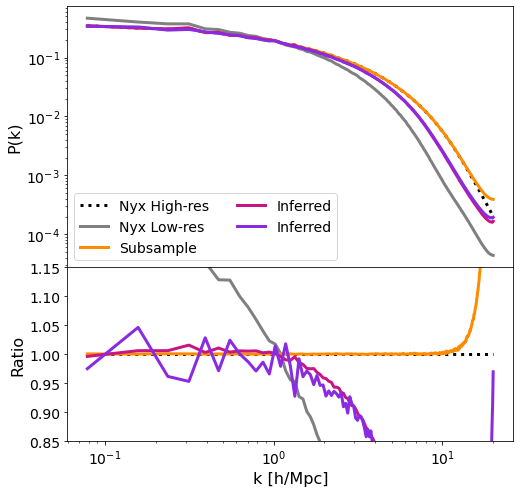

In [31]:
a_flux_1dps = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/lya_all_axes/out_4096_z_flux_ps1d.txt')
b_flux_1dps = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/lya_products/out_coarse_512_flux_ps1d.txt')
c_flux_1dps = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/lya_products/imvar03_flux_ps1d.txt')

d_flux_1dps = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/lya_products/infer_sig03_fftflux_ps1d.txt')
e_flux_1dps = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/lya_products/valid_new_fft_pdf_flux_ps1d.txt')


data = [a_flux_1dps, b_flux_1dps, c_flux_1dps, d_flux_1dps, e_flux_1dps]
names = ['Nyx High-res', 'Nyx Low-res', 'Subsample', 'Inferred', 'Inferred']
colors = ['black', 'grey', 'darkorange', 'mediumvioletred', 'blueviolet', 'darkblue', 'darkblue']
lines = [':', '-', '-', '-', '-', '-', ':']

w=3
ts=20
ls=16
tick=14

k='black'
o='darkorange'
p='mediumvioletred'
b='blueviolet'

fig = plt.figure(figsize=(8, 8))
gs =  fig.add_gridspec(2, 1, height_ratios=[3,2], hspace=0)
axs = gs.subplots(sharex=True)



# Plot each graph, and manually set the y tick values
for i, line in enumerate(data):
    axs[0].plot(line[:,2][:255], line[:,3][:255], lines[i], label=names[i], c=colors[i], lw=w)


axs[0].set_ylabel('P(k)', fontsize=ls)
axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[0].tick_params(axis='y', labelsize=tick)
axs[0].set_xticklabels([])
axs[0].legend(loc='lower left', fontsize=tick, ncol=2)

#axs[1].axvline(x=1, color='k', linestyle='--')
for i, line in enumerate(data):
    axs[1].plot(line[:,2][:255], line[:,3][:255]/a_flux_1dps[:,3][:255], lines[i], label=names[i], c=colors[i], lw=w)
    #axs[1].plot(line[:,2][:255], np.sqrt(line[:,3][:255]/a_flux_1dps[:,3][:255]), lines[i], label=names[i], c=colors[i], lw=w)

axs[1].set_xlabel('k [h/Mpc]', fontsize=ls)
axs[1].set_ylabel('Ratio', fontsize=ls)
#axs[1].set_ylabel('T(k)', fontsize=ls)

axs[1].set_xscale('log')
axs[1].set_ylim([0.85, 1.15])

axs[1].tick_params(axis='x', labelsize=tick)
axs[1].tick_params(axis='y', labelsize=tick)



# Hide x labels and tick labels for all but bottom plot.

for ax in axs:
    ax.label_outer()
    
plt.subplots_adjust(hspace=None)
fig.savefig('figures/ps1d_residual.jpg')
plt.show()

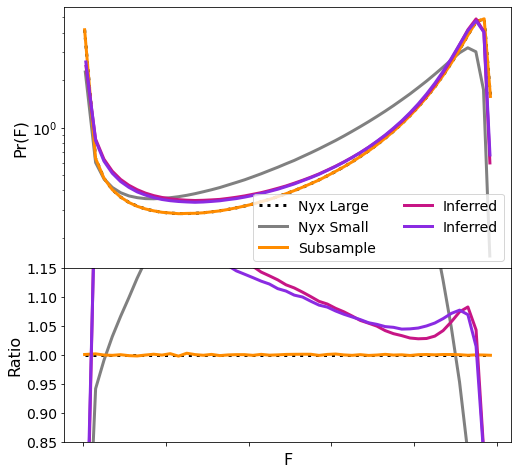

In [22]:
a_flux_pdf = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/lya_all_axes/out_4096_z_flux_pdf.txt')
b_flux_pdf = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/lya_products/out_coarse_512_flux_pdf.txt')
c_flux_pdf = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/lya_products/imvar03_flux_pdf.txt')

d_flux_pdf = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/lya_products/infer_sig03_fftflux_pdf.txt')
e_flux_pdf = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/lya_products/infer_sig03_rev_flux_pdf.txt')

f_flux_pdf = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/lya_products/imvar_pyr07_tau_sub_flux_pdf.txt')


data = [a_flux_pdf, b_flux_pdf, c_flux_pdf, d_flux_pdf, e_flux_pdf ]
names = ['Nyx High-res', 'Nyx Low-res', 'Subsample', 'Inferred', 'Inferred', 'Inferred']
colors = ['black', 'grey', 'darkorange', 'mediumvioletred', 'blueviolet', 'darkblue']
lines = [':', '-', '-', '-', '-', '-']

w=3
ts=20
ls=16
tick=14

k='black'
o='darkorange'
p='mediumvioletred'
b='blueviolet'

fig = plt.figure(figsize=(8, 8))
gs =  fig.add_gridspec(2, 1, height_ratios=[3,2], hspace=0)
axs = gs.subplots(sharex=True)



# Plot each graph, and manually set the y tick values
for i, line in enumerate(data):
    axs[0].plot(line[:,2], line[:,3], lines[i], label=names[i], c=colors[i], lw=w)


axs[0].set_ylabel('Pr(F)', fontsize=ls)
axs[0].set_yscale('log')
#axs[0].set_xscale('log')
axs[0].tick_params(axis='y', labelsize=tick)
axs[0].set_xticklabels([])
axs[0].legend(loc='lower right', fontsize=tick, ncol=2)

#axs[1].axvline(x=1, color='k', linestyle='--')
for i, line in enumerate(data):
    axs[1].plot(line[:,2], line[:,3]/a_flux_pdf[:,3], lines[i], label=names[i], c=colors[i], lw=w)
    #axs[1].plot(line[:,2][:255], np.sqrt(line[:,3][:255]/a_flux_1dps[:,3][:255]), lines[i], label=names[i], c=colors[i], lw=w)

axs[1].set_xlabel('F', fontsize=ls)
axs[1].set_ylabel('Ratio', fontsize=ls)
#axs[1].set_ylabel('T(k)', fontsize=ls)

#axs[1].set_xscale('log')
axs[1].set_ylim([0.85, 1.15])

axs[1].tick_params(axis='x', labelsize=tick)
axs[1].tick_params(axis='y', labelsize=tick)



# Hide x labels and tick labels for all but bottom plot.

for ax in axs:
    ax.label_outer()
    
plt.subplots_adjust(hspace=None)
fig.savefig('figures/pdf_residual.jpg')
plt.show()

In [72]:
print(((e_flux_1dps[:,3][:255]-a_flux_1dps[:,3][:255])/a_flux_1dps[:,3][:255])*100)

[ 9.77168381e-01  9.59477458e-01  8.47584690e-01  9.06964334e-01
  7.83356556e-01  7.72316308e-01  6.97614863e-01  6.75122210e-01
  6.35783397e-01  5.94103092e-01  5.02419069e-01  4.93223324e-01
  3.92922982e-01  3.08613982e-01  2.69804878e-01  2.12926872e-01
  1.83832362e-01  1.00660346e-01  3.60986326e-02  1.34044160e-02
 -4.02492398e-02 -8.76991139e-02 -1.47914704e-01 -2.05167109e-01
 -2.70555703e-01 -2.94923837e-01 -3.83797550e-01 -3.86961482e-01
 -5.10583385e-01 -5.64133465e-01 -5.68469615e-01 -5.88832663e-01
 -6.07302712e-01 -7.61058187e-01 -7.89351597e-01 -8.41433866e-01
 -8.91656944e-01 -8.91408610e-01 -9.48889967e-01 -8.91864096e-01
 -9.94984668e-01 -1.02939533e+00 -1.08385258e+00 -1.14461504e+00
 -1.19086311e+00 -1.22726254e+00 -1.25044172e+00 -1.28249849e+00
 -1.36294592e+00 -1.45390571e+00 -1.48433441e+00 -1.50450132e+00
 -1.61948640e+00 -1.57671214e+00 -1.53519591e+00 -1.66155947e+00
 -1.75317141e+00 -1.69405520e+00 -1.73973943e+00 -1.74398066e+00
 -1.87936525e+00 -1.94987

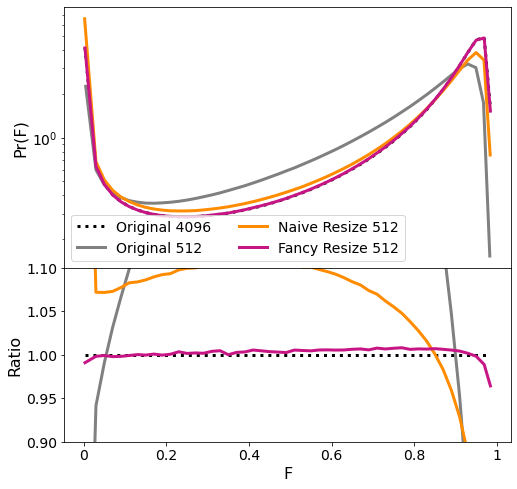

In [68]:
a_flux_pdf = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/lya_all_axes/out_4096_z_flux_pdf.txt')
b_flux_pdf = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/lya_products/out_coarse_512_flux_pdf.txt')
c_flux_pdf = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/lya_products/out_fields_1st_flux_pdf.txt')

#d_flux_pdf = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/lya_products/out_g_pyr03_f_flux_pdf.txt')
d_flux_pdf = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/lya_products/out_sub_flux_pry_035_flux_pdf.txt')

w=3
ts=20
ls=16
tick=14

k='#000000'
o='darkorange'
p='mediumvioletred'
b='blueviolet'

fig = plt.figure(figsize=(8, 8))
gs =  fig.add_gridspec(2, 1, height_ratios=[3,2], hspace=0)
axs = gs.subplots(sharex=True)


axs[0].plot(a_flux_pdf[:,2], a_flux_pdf[:,3], ':', label='Original 4096', c=k, lw=w)
axs[0].plot(b_flux_pdf[:,2], b_flux_pdf[:,3], label='Original 512', c='grey', lw=w)
axs[0].plot(c_flux_pdf[:,2], c_flux_pdf[:,3], label='Naive Resize 512', c=o, lw=w)
axs[0].plot(d_flux_pdf[:,2], d_flux_pdf[:,3], label='Fancy Resize 512', c=p, lw=w)
axs[0].set_ylabel('Pr(F)', fontsize=ls)
axs[0].set_yscale('log')
axs[0].tick_params(axis='y', labelsize=tick)
axs[0].set_xticklabels([])
axs[0].legend(loc='lower left', fontsize=tick, ncol=2)

axs[1].plot(a_flux_pdf[:,2], a_flux_pdf[:,3]/a_flux_pdf[:,3], ':', label='Original 4096', c=k, lw=w)
axs[1].plot(b_flux_pdf[:,2], b_flux_pdf[:,3]/a_flux_pdf[:,3], label='Original 512', c='grey', lw=w)
axs[1].plot(c_flux_pdf[:,2], c_flux_pdf[:,3]/a_flux_pdf[:,3], label='Pyramid 512', c=o, lw=w)
axs[1].plot(d_flux_pdf[:,2], d_flux_pdf[:,3]/a_flux_pdf[:,3], label='Downsampled 512', c=p, lw=w)

axs[1].set_xlabel('F', fontsize=ls)
axs[1].set_ylabel('Ratio', fontsize=ls)
axs[1].set_ylim([0.9, 1.1])

axs[1].tick_params(axis='x', labelsize=tick)
axs[1].tick_params(axis='y', labelsize=tick)
axs[1].set_xticklabels([0,0.2,0.4,0.6,0.8,1])


# Hide x labels and tick labels for all but bottom plot.

for ax in axs:
    ax.label_outer()
    
plt.xticks(np.arange(0, 1.2, 0.2))

    
plt.subplots_adjust(hspace=None)
fig.savefig('pdf_residual.jpg')
plt.show()

In [98]:
from scipy import signal
path = '/pscratch/sd/z/zarija/MLHydro/fields_1st_512.hdf5'
file = h5py.File(path, 'r')
dtype=np.single

tau = file['derived_fields']['tau_red'][:,:,:].astype(np.single)
print(np.max(tau))
print(np.min(tau))
F = np.exp(-tau)

197729120.0
0.0031309957


x_space: [1.00000000e-02 1.24519708e-02 1.55051578e-02 1.93069773e-02
 2.40409918e-02 2.99357729e-02 3.72759372e-02 4.64158883e-02
 5.77969288e-02 7.19685673e-02 8.96150502e-02 1.11588399e-01
 1.38949549e-01 1.73019574e-01 2.15443469e-01 2.68269580e-01
 3.34048498e-01 4.15956216e-01 5.17947468e-01 6.44946677e-01
 8.03085722e-01 1.00000000e+00 1.24519708e+00 1.55051578e+00
 1.93069773e+00 2.40409918e+00 2.99357729e+00 3.72759372e+00
 4.64158883e+00 5.77969288e+00 7.19685673e+00 8.96150502e+00
 1.11588399e+01 1.38949549e+01 1.73019574e+01 2.15443469e+01
 2.68269580e+01 3.34048498e+01 4.15956216e+01 5.17947468e+01
 6.44946677e+01 8.03085722e+01 1.00000000e+02 1.24519708e+02
 1.55051578e+02 1.93069773e+02 2.40409918e+02 2.99357729e+02
 3.72759372e+02 4.64158883e+02 5.77969288e+02 7.19685673e+02
 8.96150502e+02 1.11588399e+03 1.38949549e+03 1.73019574e+03
 2.15443469e+03 2.68269580e+03 3.34048498e+03 4.15956216e+03
 5.17947468e+03 6.44946677e+03 8.03085722e+03 1.00000000e+04]
y_space: [1.00

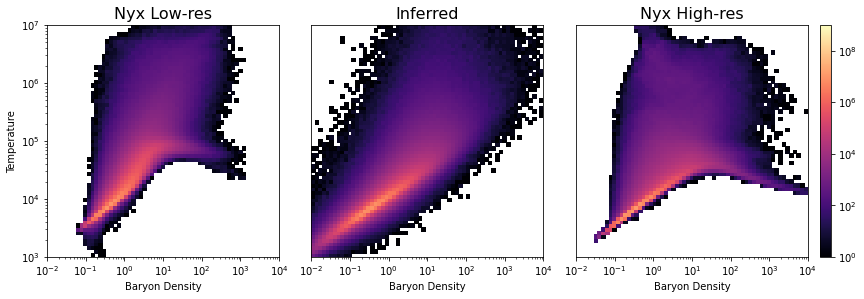

In [76]:
thisNorm = LogNorm(vmin=1e0, vmax=1e9)

x_space = np.logspace(-2, 4, 64)
print('x_space:', x_space)

y_space = np.logspace(3, 7, 64)
print('y_space:', y_space)

fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(1, 4, width_ratios=[1,1,1,0.04], height_ratios=[1])


#  Varying density along a streamline
ax0 = fig.add_subplot(gs[0, 0])
ax0.hist2d(a_rhos, a_Ts, bins=(x_space, y_space), norm=thisNorm, cmap=cm.magma);
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_title('Nyx Low-res', fontsize=16)
ax0.set_ylabel('Temperature')
ax0.set_xlabel('Baryon Density')
ax0.set_box_aspect(1)


ax1 = fig.add_subplot(gs[0, 1])
ax1.hist2d(b_rhos, b_Ts, bins=(x_space, y_space), norm=thisNorm, cmap=cm.magma);
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_box_aspect(1)
ax1.set_title('Inferred', fontsize=16)
ax1.set_xlabel('Baryon Density')
ax1.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off

ax2 = fig.add_subplot(gs[0, 2])
im = ax2.hist2d(c_rhos, c_Ts, bins=(x_space, y_space), norm=thisNorm, cmap=cm.magma);
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_box_aspect(1)
ax2.set_title('Nyx High-res', fontsize=16)
ax2.set_xlabel('Baryon Density')
ax2.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off

axins = inset_axes(ax2,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=ax2.transAxes,
                   borderpad=0,
                   )

cbar1 = plt.colorbar(im[3], cax=axins)

plt.tight_layout()
fig.savefig('figures/hist2d_grid.png', bbox_inches='tight')
fig.savefig('figures/hist2d_grid.jpg', bbox_inches='tight')
fig.show()


0.68296015
0.0


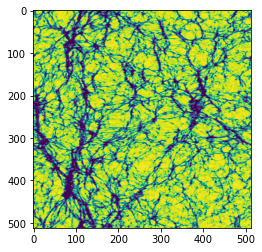

In [6]:
plt.imshow(F[0,:,:])
print(np.mean(F))
print(np.min(F))

In [4]:
reg_path = '/pscratch/sd/z/zarija/MLHydro/g_pyr_s03.hdf5'
reg = h5py.File(reg_path, 'r')
dtype=np.single
#reg_field = np.log(reg[folder][field][:ext,:ext,:ext].astype(dtype))
tau = reg['derived_fields']['tau_red'][:,:,:].astype(dtype)
F = np.exp(-tau)

f, Pxx_den = signal.welch(F, fs=1)
Pk = np.mean(Pxx_den, axis=(0,1))
f = f*40
print(f)


[ 0.       0.15625  0.3125   0.46875  0.625    0.78125  0.9375   1.09375
  1.25     1.40625  1.5625   1.71875  1.875    2.03125  2.1875   2.34375
  2.5      2.65625  2.8125   2.96875  3.125    3.28125  3.4375   3.59375
  3.75     3.90625  4.0625   4.21875  4.375    4.53125  4.6875   4.84375
  5.       5.15625  5.3125   5.46875  5.625    5.78125  5.9375   6.09375
  6.25     6.40625  6.5625   6.71875  6.875    7.03125  7.1875   7.34375
  7.5      7.65625  7.8125   7.96875  8.125    8.28125  8.4375   8.59375
  8.75     8.90625  9.0625   9.21875  9.375    9.53125  9.6875   9.84375
 10.      10.15625 10.3125  10.46875 10.625   10.78125 10.9375  11.09375
 11.25    11.40625 11.5625  11.71875 11.875   12.03125 12.1875  12.34375
 12.5     12.65625 12.8125  12.96875 13.125   13.28125 13.4375  13.59375
 13.75    13.90625 14.0625  14.21875 14.375   14.53125 14.6875  14.84375
 15.      15.15625 15.3125  15.46875 15.625   15.78125 15.9375  16.09375
 16.25    16.40625 16.5625  16.71875 16.875   17.03

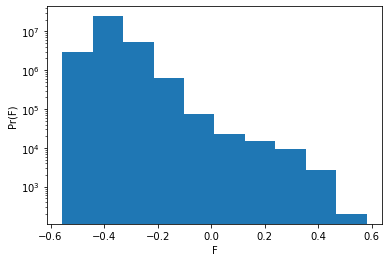

In [95]:
c_path = '/pscratch/sd/c/cjacobus/Nyx_512/valid_s2_512_invar3_hydro.h5'
c = h5py.File(c_path, 'r')

'''
field = c['native_fields']['baryon_density'][16,:,:].astype(dtype)
field = np.log((field+1))/10

field = c['native_fields']['temperature'][16,:,:].astype(dtype)
field = np.log((field))/8 -1

field = c['native_fields']['velocity_z'][16,:,:].astype(dtype)
field = np.log((field))/17

field = c['derived_fields']['tau_red'][16,:,:].astype(dtype)
field = np.log((field+1))/17

'''

#field = c['native_fields']['baryon_density'][16,:,:].astype(np.single)
field = c['fine'][4,::4,:,:].astype(np.single)
#field = np.log(field+1)/20

flat = field.flatten()

fig, ax = plt.subplots()
#ax.plot(rho_pdf[:,2], rho_pdf[:,3], label='infer density')
#ax.plot(raw_rho_pdf[:,2], raw_rho_pdf[:,3], label='raw density')

#ax.hist(flat, bins=np.logspace(np.log10(0.1),np.log10(1000), 50))
ax.hist(flat)

#ax.plot(raw_temp_pdf[:,2], raw_temp_pdf[:,3], label='raw temperature')

ax.set_xlabel('F')
ax.set_ylabel('Pr(F)')
ax.set_yscale('log')
#ax.set_xscale('log')
#ax.legend(loc='lower left', fontsize=tick)
fig.show()


In [162]:
pred_path = '/pscratch/sd/z/zarija/MLHydro/L80_N4096_z3_s1.hdf5' 
#pred_path = '/pscratch/sd/z/zarija/MLHydro/L80_N512_z3_s1.hdf5'
pred = h5py.File(pred_path, 'r')
#rho = np.log(pred['native_fields']['baryon_density'][256,:2048,:2048])
#temp = np.log(pred['native_fields']['temperature'][256,:2048,:2048])
tau = np.log(pred['derived_fields']['tau_red'][0,512:1024,0:512])



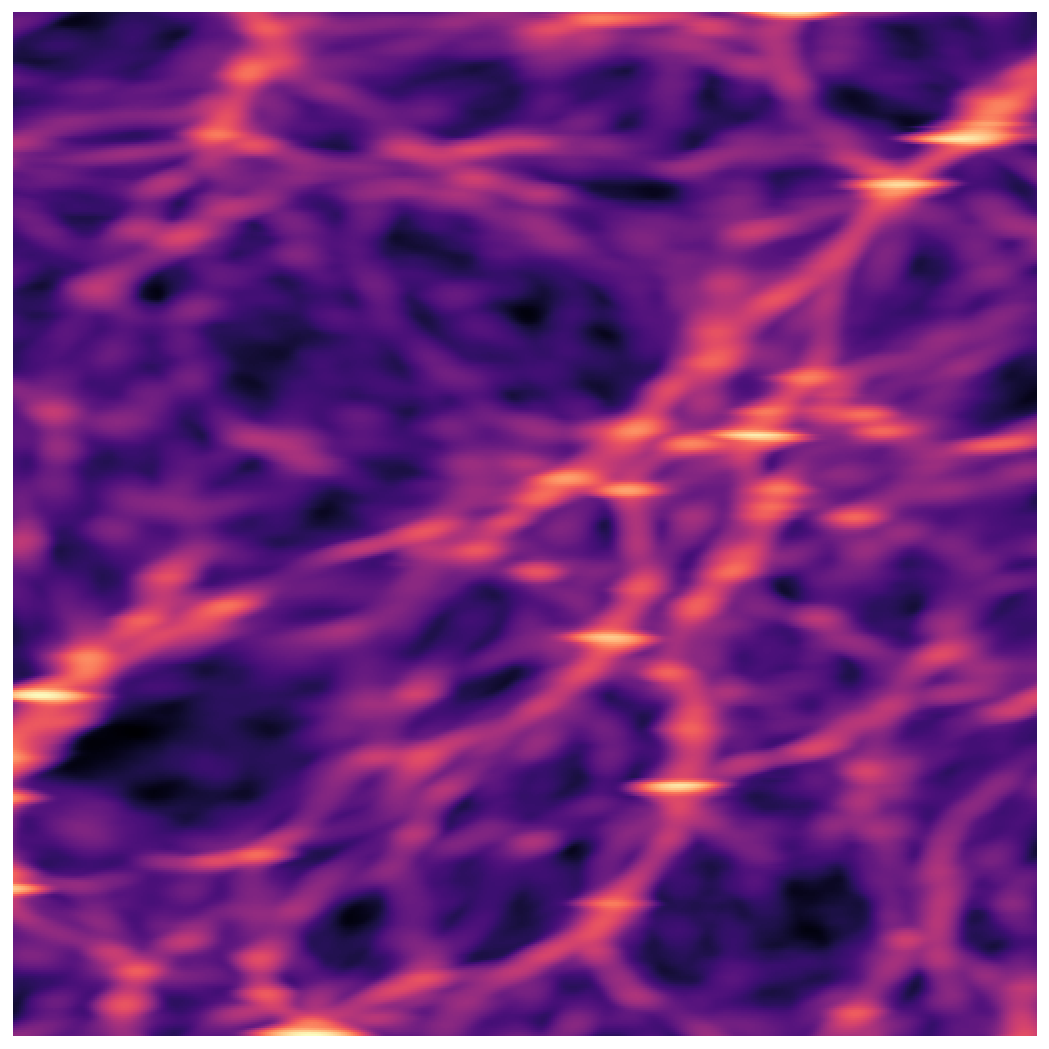

In [166]:
fig = plt.figure(figsize=(8, 8), dpi=128, frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.imshow(tau, cmap=cm.magma)
plt.imsave("HD.jpg", tau, cmap=cm.magma)

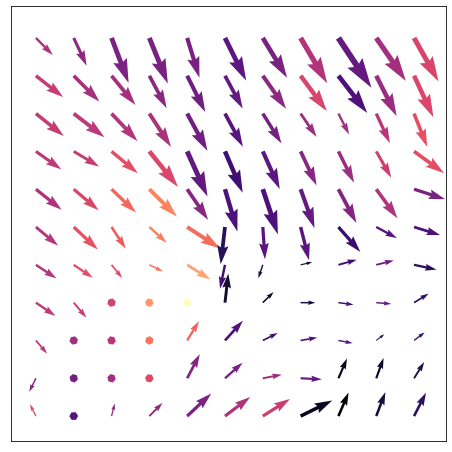

In [142]:
# Creating arrow
step=12
x = np.arange(0, 128, step)
y = np.arange(0, 128, step)
 
X, Y = np.meshgrid(x, y)
u = pred['native_fields']['velocity_x'][0,192:320:step,320:448:step]/50000000
v = pred['native_fields']['velocity_y'][0,192:320:step,320:448:step]/50000000
color = pred['native_fields']['velocity_z'][0,192:320:step,320:448:step]

# creating plot
fig, ax = plt.subplots(figsize =(14, 8))
#ax.imshow(rho, cmap=cm.magma)
ax.quiver(X, Y, u, v, color, cmap=cm.magma, width=0.02, minshaft=2, scale=8, scale_units='width')
 
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.axis([-8, 128+2, -8, 128+2])
ax.set_aspect('equal')
 
# show plot
plt.show()
fig.savefig('vel.png')

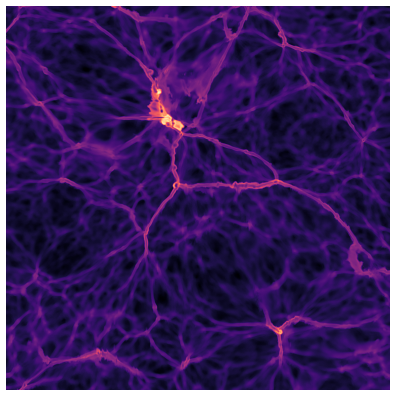

In [144]:

path = '/pscratch/sd/z/zarija/MLHydro/L80_N4096_z3_s1.hdf5'
file = h5py.File(path, 'r')

#tau = np.exp(-file['derived_fields']['tau_real'][0,1536:2560,2560:3584])
field = np.log(file['native_fields']['temperature'][0,1536:2560,2560:3584])

fig = plt.figure(figsize=(6, 6), dpi=64, frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.imshow(field, cmap=cm.magma)
plt.imsave("temp.png", field, cmap=cm.magma)